# Machine Learning
---------


### Author Information
**Author:** PJ Gibson  
**Email:** Peter.Gibson@doh.wa.gov  
**Github:**   https://github.com/DOH-PJG1303

### Project Information
**Created Date:** 2023-05-27  
**Last Updated:** 2023-05-27  
**Version:** 1  

### Description
This notebook should serve to educate newcomers to Python on simple Machine Learning techniques in the context of Record Linkage.

### Notes


## 1. Import Libraries

In [6]:
# Standard data analysis tools
import pandas as pd
import numpy as np

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

# Plotting tools
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Prep Data

### 2.1 Read in data

In [36]:
df1 = pd.read_csv('Data/synthetic_df1.csv', dtype=str)
df2 = pd.read_csv('Data/synthetic_df2.csv', dtype=str)

df = pd.read_csv('Data/synthetic_training_data.csv')

### 2.2 Test Train Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1), df['label'], test_size=0.2, random_state=42)


## 3. Machine Learning Training

### 3.1 Decision Tree


#### Notes on parameter tuning
----- 

Parameter tuning in machine learning is the process of selecting the appropriate set of optimal parameters for a model in order to improve its accuracy or other metrics. In the case of the Decision Tree, the parameters we are tuning are 'max_depth' and 'criterion'.

'max_depth' is the maximum depth of the tree. It is used to control over-fitting as higher depth will allow the model to learn relations very specific to a particular sample.
'criterion' is the function to measure the quality of a split. Sklearn supports “gini” for the Gini impurity and “entropy” for the information gain.
GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

In our code, we used GridSearchCV with 5-fold cross-validation for the hyperparameter tuning of our Decision Tree model. This means the training set is split into 5 parts and the model will be trained and validated 5 times to get a better estimate of the model performance.

After identifying the best parameters using GridSearchCV, the model is evaluated on the test data. Evaluation metrics like the classification report and confusion matrix provide comprehensive insights about model performance. The classification report shows precision, recall, f1-score, and support for each class while the confusion matrix visualizes the correct predictions and the errors made by the model.

In [4]:
# Define parameter grid
param_grid = {'max_depth': range(1, 11), 'criterion': ['gini', 'entropy']}

# Initialize a DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Initialize GridSearchCV
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11)},
             scoring='accuracy')

Best parameters: {'criterion': 'entropy', 'max_depth': 10}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19993
           1       1.00      1.00      1.00     20007

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

Accuracy: 0.9989


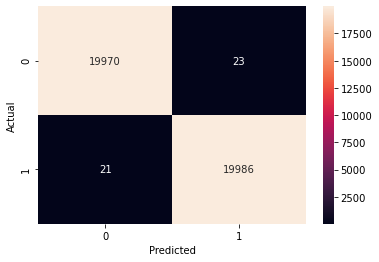

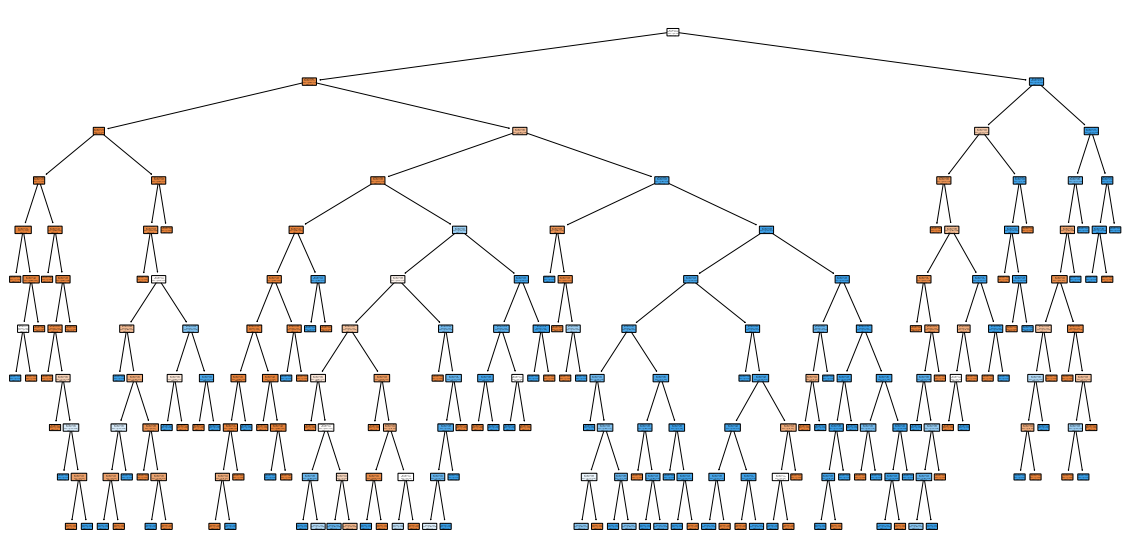

In [12]:
# Print the best parameters
print(f"Best parameters: {grid.best_params_}")

# Predict on the test data
y_pred = grid.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Assuming grid.best_estimator_ is your trained DecisionTreeClassifier
dt_best = grid.best_estimator_

# Set larger figure size
plt.figure(figsize=(20,10))

# Plot the tree
plot_tree(dt_best, filled=True, rounded=True, feature_names=X_train.columns, class_names=True, proportion=True)

# Show the plot
plt.show()

In [22]:
df.iloc[(y_pred != y_test).index.to_list()]

,Unnamed: 0,Unnamed: 1,fname,lname,dob,add,phone,label
119737,53019,16159,1.000000,0.944444,1.000000,1.000000,0.6,1
72272,33127,49009,0.464286,0.531746,0.600000,0.511544,0.6,0
158154,69895,62755,1.000000,1.000000,1.000000,1.000000,0.0,1
65426,36180,105936,0.518519,0.527778,0.533333,0.458333,0.6,0
30074,61099,28338,0.000000,0.000000,0.516667,0.533333,0.6,0
...,...,...,...,...,...,...,...,...
4174,90905,101700,0.464286,0.000000,0.516667,0.530303,0.6,0
91537,2845,78659,0.777778,1.000000,0.848333,0.566612,0.1,0
156449,2343,2343,1.000000,0.975000,1.000000,1.000000,0.6,1
184376,65788,43776,1.000000,1.000000,1.000000,1.000000,0.6,1


In [29]:
list_results = y_pred == y_test

In [33]:
wrong_indices = list_results[list_results == False].index

In [37]:
wrong_responses = df.iloc[wrong_indices]

In [52]:
for i in range(0,10):
    df1_index = wrong_responses.iloc[i]['Unnamed: 0']
    df2_index = wrong_responses.iloc[i]['Unnamed: 1']
    label = wrong_responses.iloc[i]['label']
    part1 = df1.loc[int(df1_index)]
    part2 = df2.loc[int(df2_index)]
    combined = pd.concat([part1,part2], ignore_index=True, axis=1).transpose()
    print(f'label = {label}')
    display(combined)
    print('\n\n')

label = 1.0


,ssn,fname,lname,dob,phone,add,unique_id,parents_partnership_id,house_id,building_id
0,543-27-7171,ELIZABETH,CISNEROS,2004-07-16,5412682947,95543 N Way Ln,103079220195,950326,171798736099,16373
1,543-27-7171,BETH,CISNEROS,2004-07-16,NaN,386 1st Ct,103079220196,950326,128849110463,16373





label = 1.0


,ssn,fname,lname,dob,phone,add,unique_id,parents_partnership_id,house_id,building_id
0,543-63-0983,SCOTT,PATTERSON,2007-12-09,5032592881,25670 SW Melott Rd,25769809605,1031302,94489432267,2937987
1,543-63-0983,PATTERSSON,SCEETER,2007-12-09,(503)-256-1264,3147 Liberty Rd,25769809604,1031302,180388648929,2937987





label = 1.0


,ssn,fname,lname,dob,phone,add,unique_id,parents_partnership_id,house_id,building_id
0,557-22-7472,ADELINE,WONG,2018-11-12,5419560889,943 Olive St,34359745242,1134084,120259090514,1946544
1,557-22-7472,WONG,ADELINE,2018-11-12,(971)-214-4428,1224 River Bend Rd NW,34359745241,1134084,197568522762,1946544





label = 0.0


,ssn,fname,lname,dob,phone,add,unique_id,parents_partnership_id,house_id,building_id
0,543-26-8356,OLIVIA,SMITH,1994-03-12,5413536320,8248 SW Red Cloud Rd,111669156730,824588,154618879056,716960
1,543-26-8319,JULIA,SMITH,1994-03-12,(541)-294-8375,1395 McDaniel Rd,60129547358,824588,206158567659,716960





label = 1.0


,ssn,fname,lname,dob,phone,add,unique_id,parents_partnership_id,house_id,building_id
0,276-22-9952,WAYNE,BARRETT,2019-03-29,9712838016,7801 SW Winters Rd APT 2,278,1348828,34359765046,329473
1,276-22-9952,DENNIS,BARRETT,2019-03-29,(541)-992-6896,1124 Seabird Ln SW,277,1348828,111669297898,329473





label = 0.0


,ssn,fname,lname,dob,phone,add,unique_id,parents_partnership_id,house_id,building_id
0,543-17-2632,JOSE,LONDOS,2003-06-14,5415292329,2393 16th St,34359743221,1025016,154618843664,2642081
1,543-85-1094,ALXEANDER,LOONDOS,NaN,(541)-529-2329,2393 16th St,42949679321,1025016,154618843664,2642081





label = 1.0


,ssn,fname,lname,dob,phone,add,unique_id,parents_partnership_id,house_id,building_id
0,505-52-8065,AVA,GORRELL,2020-04-06,5412629771,63504 Isthmus Hts Cutoff Ln,34359738933,1082451,188978653007,2840777
1,505-52-8065,VA,GORRELL,2020-04-06,(541)-706-2027,772 Seabird Dr,34359738932,1082451,128849131309,2840777





label = 1.0


,ssn,fname,lname,dob,phone,add,unique_id,parents_partnership_id,house_id,building_id
0,387-27-1064,HENRY,GOOD,2013-05-21,5416174820,357 NW Pleasant View Dr,94489280961,1215844,128849150101,2317214
1,387-27-1064,GOOD,HENRY,2013-05-21,(503)-987-3392,11726 SE Flavel St,94489280962,1215844,120259119563,2317214





label = 0.0


,ssn,fname,lname,dob,phone,add,unique_id,parents_partnership_id,house_id,building_id
0,397-29-0206,LIAM,CANNER,2018-07-09,4586404438,68096 Ridge Rd,68719477184,1025403,111669241866,2983086
1,709-45-3610,ROMEO,CANNER,2018-07-09,(458)-640-4438,None,60129549322,1025403,111669241866,2983086





label = 1.0


,ssn,fname,lname,dob,phone,add,unique_id,parents_partnership_id,house_id,building_id
0,094-21-3995,ARIANA,RAINWATER,2018-08-30,5415504044,547 8th Ct,8589934680,1048061,206158464364,1042850
1,094-21-3995,RAINWATER,ARIAN,NaN,(541)-550-4044,54 8th Ct,8589934680,1048061,206158464364,1042850


In [51]:
pd.concat([part1,part2], ignore_index=True, axis=1).transpose()

,ssn,fname,lname,dob,phone,add,unique_id,parents_partnership_id,house_id,building_id
0,094-21-3995,ARIANA,RAINWATER,2018-08-30,5415504044,547 8th Ct,8589934680,1048061,206158464364,1042850
1,094-21-3995,RAINWATER,ARIAN,NaN,(541)-550-4044,54 8th Ct,8589934680,1048061,206158464364,1042850
